In [135]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [136]:
# Special packages
import statsmodels.api as sm
import numpy as np
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Q1: Read in data file

Read in .dat file of Clinton voter data, separate into columns

In [137]:
df = pd.read_csv('http://www.stat.ufl.edu/~winner/data/clinton1.dat', sep = "\s+\s", header=None)
df.columns = ['County', 'percentVoting', 'medAge', 'meanSavings', 'Income', 'percentPoverty', 'percentVeterans', 'percentFemale', 'popDensity', 'percentNursing', 'crimeIndex']
df.set_index('County', inplace=True)
df

/Users/justintodes/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,percentVoting,medAge,meanSavings,Income,percentPoverty,percentVeterans,percentFemale,popDensity,percentNursing,crimeIndex
County,,,,,,,,,,
"Autauga, AL",30.92,31.7,57623,15768,15.2,10.74,51.41,60.4,2.36,457
"Baldwin, AL",26.24,35.5,84935,16954,13.6,9.73,51.34,66.5,5.40,282
"Barbour, AL",46.36,32.8,83656,15532,25.0,8.82,53.03,28.8,7.02,47
"Blount, AL",32.92,34.5,61249,14820,15.0,9.67,51.15,62.4,2.36,185
"Bullock, AL",67.67,31.7,75725,11120,33.0,7.08,50.76,17.6,2.91,141
"Butler, AL",47.43,33.5,75887,12015,27.1,9.48,53.25,28.1,7.98,266
"Calhoun, AL",38.44,32.7,76073,15162,18.0,11.95,51.66,190.8,4.81,560
"Chambers, AL",45.36,34.8,40498,13887,18.8,10.52,52.77,62.1,6.15,218
"Cherokee, AL",53.61,36.3,56386,13936,15.4,9.29,50.82,35.8,5.61,51


# Q2: Predict percentVoting on all regressors

Run regression on percentVoting compared to all regressors to determine two worst regressors

In [138]:
y, X = dmatrices('percentVoting ~ medAge + meanSavings + Income + percentPoverty + percentVeterans + percentFemale + popDensity + percentNursing + crimeIndex', data=df, return_type='dataframe')
y[:3]

,percentVoting
County,
"Autauga, AL",30.92
"Baldwin, AL",26.24
"Barbour, AL",46.36


In [139]:
X[:3]

,Intercept,medAge,meanSavings,Income,percentPoverty,percentVeterans,percentFemale,popDensity,percentNursing,crimeIndex
County,,,,,,,,,,
"Autauga, AL",1.0,31.7,57623.0,15768.0,15.2,10.74,51.41,60.4,2.36,457.0
"Baldwin, AL",1.0,35.5,84935.0,16954.0,13.6,9.73,51.34,66.5,5.40,282.0
"Barbour, AL",1.0,32.8,83656.0,15532.0,25.0,8.82,53.03,28.8,7.02,47.0


In [140]:
model = sm.OLS(y, X)       # Set up the model
result = model.fit()       # Fit model (find the intercept and slopes)
print result.summary()

                            OLS Regression Results                            
Dep. Variable:          percentVoting   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     145.4
Date:                Tue, 10 Apr 2018   Prob (F-statistic):          4.12e-224
Time:                        13:26:49   Log-Likelihood:                -9576.0
No. Observations:                2704   AIC:                         1.917e+04
Df Residuals:                    2694   BIC:                         1.923e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -38.3094      5.818     

## The two highest (and therefore worst) p-values are Median Age and Crime Index.

# Q3: Formula Writing Function

Function to create regression formula (vs percentVoting) given list of regressors

In [141]:
def formula(var):
    s = "percentVoting ~ "
    for i in var:
        s += i + " + "
    s = s[:-3]
    return s
    
formula(['medAge', 'meanSavings'])

'percentVoting ~ medAge + meanSavings'

# Q4: R-Squared Function

Function to find r-squared value of regression (vs percentVoting) given list of regressors

In [142]:
def rsquared(var):
    y, X = dmatrices(formula(var), data=df, return_type='dataframe')
    model = sm.OLS(y, X)       # Set up the model
    result = model.fit()       # Fit model
    print 'R-squared =', result.rsquared
    
rsquared(['medAge', 'meanSavings'])

R-squared = 0.0197670966596


# Q5: Next Best Regressor

Function to create formula given two lists, as well as function to determine best next regressor (and r-squared value) given list of all regressors and list of current regressors

In [144]:
def formula_generic(all_var, curr_var):
    s = ""
    l = []
    for i in all_var:
        s += i + " ~ "
        for j in curr_var:
            s += j + " + "
        s = s[:-3]
        l.append(s)
        s = ""
    return l
    
formula_generic(['percentVoting', 'Income'], ['medAge', 'meanSavings'])

['percentVoting ~ medAge + meanSavings', 'Income ~ medAge + meanSavings']

In [145]:
def best_next_regressor(all_regressor_list, current_regressors_list):
    equations = formula_generic(all_regressor_list, current_regressors_list)
    rsquared = []
    for i in equations:
        y, X = dmatrices(i, data=df, return_type='dataframe')
        model = sm.OLS(y, X)       # Set up the model
        result = model.fit()       # Fit model
        rsquared.append([i, result.rsquared])
    print rsquared
    best_regressor = max([sublist[-1] for sublist in rsquared]), str([sublist[0]])
    
    text = str(best_regressor[1])
    excl_beg = "['"
    excl_end = " "
  
    regressor_name = text[text.find(excl_beg) + len(excl_beg):text.find(excl_end) + len(excl_end)-1]
    best_reg_value = best_regressor[0]
    
    print
    print "Best regressor is", regressor_name, "with value of", best_reg_value
    return regressor_name

best_next_regressor(['percentVoting', 'Income', 'percentVeterans'], ['medAge', 'meanSavings'])

[['percentVoting ~ medAge + meanSavings', 0.019767096659576211], ['Income ~ medAge + meanSavings', 0.14927768831278021], ['percentVeterans ~ medAge + meanSavings', 0.30363944041644575]]

Best regressor is percentVeterans with value of 0.303639440416


'percentVeterans'

# Q6: k Best Regressors

In [146]:
def best_regressors(num_regressors, all_regressors_list):
    l = []
    for i in best_next_regressor(['percentVoting', 'Income', 'percentVeterans'], ['medAge', 'meanSavings'])

SyntaxError: invalid syntax (<ipython-input-146-be34c14a8c38>, line 3)

# Q7: Regressors in Best Order

# Q8: Plot R-Squared Values as Regressors are Added in Best Order

# Q9: Classification Target

Classification target = 1 if percentVoting >= 40% or 0 if percentVoting < 40% (apply mask)

In [149]:
# Create a new 'target' column with all 0
df['target'] = 0.0

# Mask the rows
mask = df['percentVoting'] >= 40
df.loc[mask, 'target'] = 1.0
df[:5]

,percentVoting,medAge,meanSavings,Income,percentPoverty,percentVeterans,percentFemale,popDensity,percentNursing,crimeIndex,target
County,,,,,,,,,,,
"Autauga, AL",30.92,31.7,57623,15768,15.2,10.74,51.41,60.4,2.36,457,0.0
"Baldwin, AL",26.24,35.5,84935,16954,13.6,9.73,51.34,66.5,5.40,282,0.0
"Barbour, AL",46.36,32.8,83656,15532,25.0,8.82,53.03,28.8,7.02,47,1.0
"Blount, AL",32.92,34.5,61249,14820,15.0,9.67,51.15,62.4,2.36,185,0.0
"Bullock, AL",67.67,31.7,75725,11120,33.0,7.08,50.76,17.6,2.91,141,1.0


# Q10: Training and Test Sets

Create design matrices for predicting target based on percentPoverty and popDensity; 70% training and 30% testing

In [167]:
Y, X = dmatrices('target ~ 0 + percentPoverty + popDensity',
                 df,return_type="dataframe")
print 'Design matrix X'
print X[:5]
print 'Outcomes Y'
print Y[:5]

Design matrix X
             percentPoverty  popDensity
County                                 
Autauga, AL            15.2        60.4
Baldwin, AL            13.6        66.5
Barbour, AL            25.0        28.8
Blount, AL             15.0        62.4
Bullock, AL            33.0        17.6
Outcomes Y
             target
County             
Autauga, AL     0.0
Baldwin, AL     0.0
Barbour, AL     1.0
Blount, AL      0.0
Bullock, AL     1.0


In [168]:
y = Y['target'].values
print y[:5]

[ 0.  0.  1.  0.  1.]


In [169]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [170]:
y_train[:5]

array([ 0.,  1.,  1.,  0.,  1.])

# Q11: Accuracy of Classification

Use k-nearest neighbor to determine accuracy of classification

In [184]:
from sklearn import neighbors
model_list = []
n_list = [1,3,5,10,20,50,100,1000]
for i in n_list:
    model = neighbors.KNeighborsClassifier(n_neighbors=i,
                                       weights='uniform',
                                       p=2)
    model_list.append(model)

In [185]:
fit_list = []
for i in model_list:
    fit = i.fit(X_train, y_train)
    fit_list.append(fit)

In [186]:
X_train.iloc[0:5]

,percentPoverty,popDensity
County,,
"Coleman, TX",23.4,7.5
"Audubon, IA",11.4,16.0
"Lonoke, AR",14.2,53.4
"Oswego, NY",13.5,130.5
"Fayette, KY",15.8,816.2


In [187]:
for i in model_list:
    print 'Predictions =', i.predict(X_train.iloc[0:5])

Predictions = [ 0.  1.  1.  0.  1.]
Predictions = [ 1.  0.  0.  0.  0.]
Predictions = [ 0.  0.  0.  0.  1.]
Predictions = [ 0.  0.  0.  0.  1.]
Predictions = [ 0.  0.  0.  0.  1.]
Predictions = [ 0.  0.  0.  0.  1.]
Predictions = [ 0.  0.  0.  0.  1.]
Predictions = [ 0.  0.  1.  0.  0.]


In [208]:
from sklearn import metrics
for i in model_list:
    prediction_on_training = i.predict(X_train)
    predicted_classes = i.predict(X_test)
    print i.n_neighbors, "Nearest Neigbor(s)\t\t", metrics.accuracy_score(y_train, prediction_on_training), "Train Accuracy\t\t", metrics.accuracy_score(y_test, predicted_classes), "Test Accuracy"

1 Nearest Neigbor(s)		0.997885835095 Train Accuracy		0.600985221675 Test Accuracy
3 Nearest Neigbor(s)		0.788054968288 Train Accuracy		0.635467980296 Test Accuracy
5 Nearest Neigbor(s)		0.748414376321 Train Accuracy		0.630541871921 Test Accuracy
10 Nearest Neigbor(s)		0.720401691332 Train Accuracy		0.646551724138 Test Accuracy
20 Nearest Neigbor(s)		0.690274841438 Train Accuracy		0.658866995074 Test Accuracy
50 Nearest Neigbor(s)		0.683932346723 Train Accuracy		0.662561576355 Test Accuracy
100 Nearest Neigbor(s)		0.677589852008 Train Accuracy		0.663793103448 Test Accuracy
1000 Nearest Neigbor(s)		0.567124735729 Train Accuracy		0.576354679803 Test Accuracy


# Q12: Plots and Reasons

Scatter plot of popDensity vs percentPoverty

Text(0,0.5,u'Population Density')

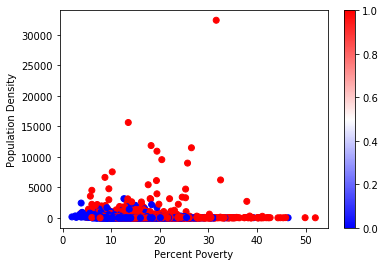

In [212]:
sc = scatter(X['percentPoverty'], X['popDensity'], c=y, cmap='bwr')
colorbar(sc)
xlabel('Percent Poverty')
ylabel('Population Density')

People who voted for Bill Clinton are mostly from counties that have medium to high poverty and low to medium population density